In [24]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

filename_loggers_out_nc='f:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1_withloggers.nc'
ds=xr.open_dataset(filename_loggers_out_nc)
#ds.sea_water_temperature_logger4_mean[0:1000]
ds=ds.isel(trajectory=0).swap_dims({'obs':'time'})
ds

<xarray.Dataset>
Dimensions:                               (time: 86839)
Coordinates:
    trajectory                            float32 1002.0
  * time                                  (time) datetime64[ns] 2018-04-11T18:00:00 ... 2018-06-11T05:57:00
    latitude                              (time) float64 ...
    longitude                             (time) float64 ...
Data variables:
    SOG                                   (time) float64 ...
    COG                                   (time) float64 ...
    HDG                                   (time) float64 ...
    HDG_WING                              (time) float64 ...
    ROLL                                  (time) float64 ...
    PITCH                                 (time) float64 ...
    WING_ANGLE                            (time) float64 ...
    BARO_PRES_MEAN                        (time) float64 ...
    BARO_PRES_STDDEV                      (time) float64 ...
    TEMP_AIR_MEAN                         (time) float64 ...
 

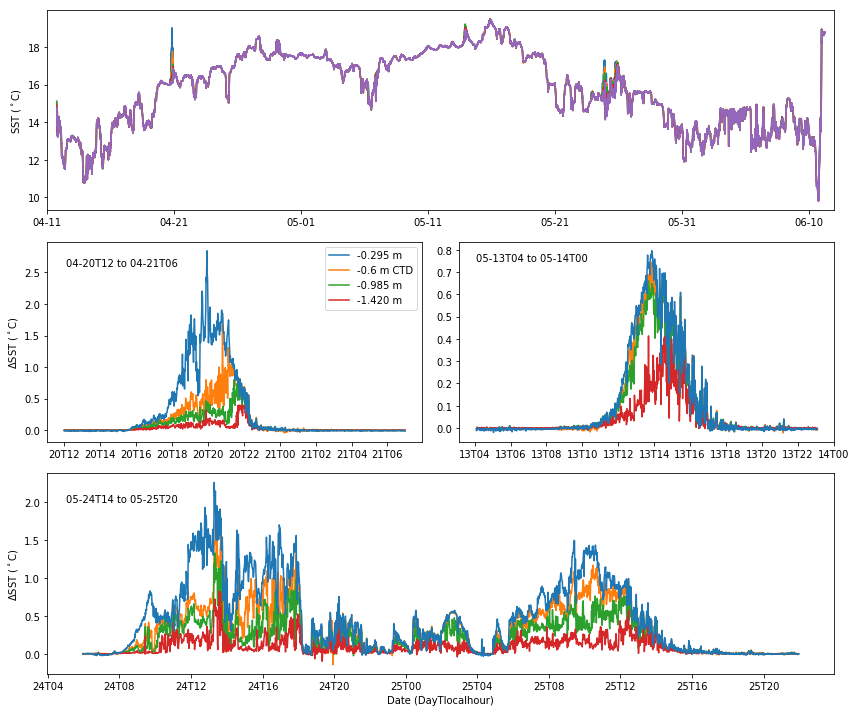

In [204]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d:%h')
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
adir_fig='C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/review1/figures/'

#ax.xaxis.set_major_formatter(myFmt)
#ds=ds.isel(trajectory=0)
#calculate local time
time_offset_to_lmt=(ds.longitude/360.)*24.*60
tlmt= ds.time.data+time_offset_to_lmt*np.timedelta64(1,'m')# dt.timedelta(seconds=1)
ds['tlmt']=tlmt
tem=str(ds.TEMP_CTD_MEAN.installed_height)+' m CTD' 

f, axes = plt.subplots(figsize=(12,10))
ax1 = plt.subplot(311)
ax2 = plt.subplot(323)
ax3 = plt.subplot(324)
#ax4 = plt.subplot(336)
ax5 = plt.subplot(313)
#ax6 = plt.subplot(338)
#ax7 = plt.subplot(339)

day = mdates.DayLocator()   # every year
hour = mdates.HourLocator()  # every month
timeFmt = mdates.DateFormatter('%d:%h')

# rotate and align the tick labels so they look better
#fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar


ax1.plot(ds.time,ds.sea_water_temperature_logger1_mean)
ax1.plot(ds.time,ds.TEMP_CTD_MEAN)
#ax1.plot(ds.time,ds.TEMP_O2_MEAN)
ax1.plot(ds.time,ds.sea_water_temperature_logger2_mean)
ax1.plot(ds.time,ds.sea_water_temperature_logger3_mean)
ax1.plot(ds.time,ds.sea_water_temperature_logger4_mean)
ax1.set_xlim('2018-04-11','2018-06-12')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))   #to get a tick every 15 minutes
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
#ax1.set_xticks()
ax1.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax1.set_ylabel('SST ($^\circ$C)')
#f, axes = plt.subplots(1,3,figsize=(12,5))
ds2 = ds.sel(time=slice('2018-04-20T12','2018-04-21T06'))
ax2.plot(ds2.time,ds2.sea_water_temperature_logger1_mean-ds2.sea_water_temperature_logger4_mean, label=ds.sea_water_temperature_logger1_mean.installed_height, zorder=10)
ax2.plot(ds2.time,ds2.TEMP_CTD_MEAN-ds2.sea_water_temperature_logger4_mean, label=tem, zorder=2)
#ax2.plot(ds2.time,ds2.TEMP_O2_MEAN-ds2.sea_water_temperature_logger4_mean)
ax2.plot(ds2.time,ds2.sea_water_temperature_logger2_mean-ds2.sea_water_temperature_logger4_mean, label=ds.sea_water_temperature_logger2_mean.installed_height, zorder=2)
ax2.plot(ds2.time,ds2.sea_water_temperature_logger3_mean-ds2.sea_water_temperature_logger4_mean, label=ds.sea_water_temperature_logger3_mean.installed_height, zorder=2)
#ax2.legend([ds.sea_water_temperature_logger1_mean.installed_height,tem,tem,ds.sea_water_temperature_logger2_mean.installed_height,ds.sea_water_temperature_logger3_mean.installed_height])
ax2.legend()
ax2.set_ylabel('$\Delta$SST ($^\circ$C)')
#ax2.legend([ds.sea_water_temperature_logger1_mean.installed_height,tem,ds.sea_water_temperature_logger2_mean.installed_height,ds.sea_water_temperature_logger3_mean.installed_height])
ax2.text('2018-04-20T1205',2.6,'04-20T12 to 04-21T06')
#ax2.format_xdata = mdates.DateFormatter('%d-%h')
#ax2.text(t[0].data+np.timedelta64(10,'m'),s1[s1mask].max().data,'A',size=12,weight='bold')
#xlabels = ax2.get_xticklabels()
#ax2.set_xticklabels(xlabels,rotation=45)
#plt.xticks(rotation=45)#ax3.set_xticks(rotation=45)
ax2.xaxis.set_major_formatter(DateFormatter('%dT%H'))

ds2 = ds.sel(time=slice('2018-05-13T12','2018-05-14T06'))
ax3.plot(ds2.tlmt,ds2.sea_water_temperature_logger1_mean-ds2.sea_water_temperature_logger4_mean, label=ds.sea_water_temperature_logger1_mean.installed_height, zorder=10)
ax3.plot(ds2.tlmt,ds2.TEMP_CTD_MEAN-ds2.sea_water_temperature_logger4_mean, label=tem, zorder=2)
#ax3.plot(ds2.tlmt,ds2.TEMP_O2_MEAN-ds2.sea_water_temperature_logger4_mean)
ax3.plot(ds2.tlmt,ds2.sea_water_temperature_logger2_mean-ds2.sea_water_temperature_logger4_mean, label=ds.sea_water_temperature_logger2_mean.installed_height, zorder=2)
ax3.plot(ds2.tlmt,ds2.sea_water_temperature_logger3_mean-ds2.sea_water_temperature_logger4_mean, label=ds.sea_water_temperature_logger3_mean.installed_height, zorder=2)
ax3.xaxis.set_major_formatter(DateFormatter('%dT%H'))
ax3.text('2018-05-13T0405',.75,'05-13T04 to 05-14T00')
#plt.xticks(rotation=90)#ax3.set_xticks(rotation=45)
# rotate and align the tick labels so they look better

#ds2 = ds.sel(time=slice('2018-05-14T06','2018-05-16T23'))
#ax4.plot(ds2.tlmt,ds2.TEMP_CTD_MEAN-ds2.sea_water_temperature_logger4_mean)
#ax4.plot(ds2.tlmt,ds2.TEMP_O2_MEAN-ds2.sea_water_temperature_logger4_mean)
#ax4.plot(ds2.tlmt,ds2.sea_water_temperature_logger1_mean-ds2.sea_water_temperature_logger4_mean)
#ax4.plot(ds2.tlmt,ds2.sea_water_temperature_logger2_mean-ds2.sea_water_temperature_logger4_mean)
#ax4.plot(ds2.tlmt,ds2.sea_water_temperature_logger3_mean-ds2.sea_water_temperature_logger4_mean)
#f, axes = plt.subplots(1,3,figsize=(12,5))
ds2 = ds.sel(time=slice('2018-05-24T14','2018-05-26T05'))
ax5.plot(ds2.tlmt,ds2.sea_water_temperature_logger1_mean-ds2.sea_water_temperature_logger4_mean, label=ds.sea_water_temperature_logger1_mean.installed_height, zorder=10)
ax5.plot(ds2.tlmt,ds2.TEMP_CTD_MEAN-ds2.sea_water_temperature_logger4_mean, label=tem, zorder=2)
#ax5.plot(ds2.tlmt,ds2.TEMP_O2_MEAN-ds2.sea_water_temperature_logger4_mean)
ax5.plot(ds2.tlmt,ds2.sea_water_temperature_logger2_mean-ds2.sea_water_temperature_logger4_mean, label=ds.sea_water_temperature_logger2_mean.installed_height, zorder=2)
ax5.plot(ds2.tlmt,ds2.sea_water_temperature_logger3_mean-ds2.sea_water_temperature_logger4_mean, label=ds.sea_water_temperature_logger3_mean.installed_height, zorder=2)
ax5.xaxis.set_major_formatter(DateFormatter('%dT%H'))
ax5.set_ylabel('$\Delta$SST ($^\circ$C)')
ax5.set_xlabel('Date (DayTlocalhour)')
ax5.text('2018-05-24T05',2,'05-24T14 to 05-25T20')
plt.tight_layout()
fig_fname=adir_fig+"sst_timeseries.png"
plt.savefig(fig_fname, transparent=False, format='png')


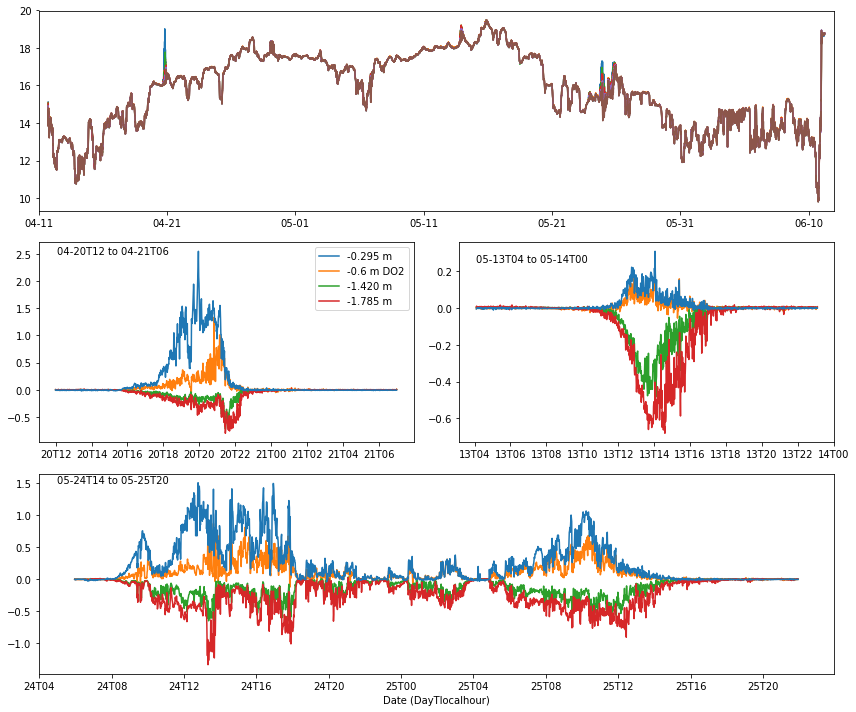

In [157]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d:%h')
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
adir_fig='C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2019_saildrone/review1/figures/'

#ax.xaxis.set_major_formatter(myFmt)
#ds=ds.isel(trajectory=0)
#calculate local time
time_offset_to_lmt=(ds.longitude/360.)*24.*60
tlmt= ds.time.data+time_offset_to_lmt*np.timedelta64(1,'m')# dt.timedelta(seconds=1)
ds['tlmt']=tlmt
tem=str(ds.TEMP_CTD_MEAN.installed_height)+' m DO2'
tem2=str(ds.TEMP_CTD_MEAN.installed_height)+' m CTD'

f, axes = plt.subplots(figsize=(12,10))
ax1 = plt.subplot(311)
ax2 = plt.subplot(323)
ax3 = plt.subplot(324)
#ax4 = plt.subplot(336)
ax5 = plt.subplot(313)
#ax6 = plt.subplot(338)
#ax7 = plt.subplot(339)

day = mdates.DayLocator()   # every year
hour = mdates.HourLocator()  # every month
timeFmt = mdates.DateFormatter('%d:%h')

# rotate and align the tick labels so they look better
#fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar


ax1.plot(ds.time,ds.sea_water_temperature_logger1_mean)
ax1.plot(ds.time,ds.TEMP_O2_MEAN)
ax1.plot(ds.time,ds.TEMP_CTD_MEAN)
ax1.plot(ds.time,ds.sea_water_temperature_logger2_mean)
ax1.plot(ds.time,ds.sea_water_temperature_logger3_mean)
ax1.plot(ds.time,ds.sea_water_temperature_logger4_mean)
ax1.set_xlim('2018-04-11','2018-06-12')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))   #to get a tick every 15 minutes
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
#ax1.set_xticks()
ax1.xaxis.set_major_formatter(DateFormatter('%m-%d'))
#f, axes = plt.subplots(1,3,figsize=(12,5))
ds2 = ds.sel(time=slice('2018-04-20T12','2018-04-21T06'))
ax2.plot(ds2.time,ds2.sea_water_temperature_logger1_mean-ds2.sea_water_temperature_logger2_mean, label=ds.sea_water_temperature_logger1_mean.installed_height, zorder=10)
#ax2.plot(ds2.time,ds2.TEMP_O2_MEAN-ds2.sea_water_temperature_logger2_mean)
ax2.plot(ds2.time,ds2.TEMP_CTD_MEAN-ds2.sea_water_temperature_logger2_mean, label=tem, zorder=2)
#ax2.plot(ds2.time,ds2.sea_water_temperature_logger2_mean-ds2.sea_water_temperature_logger4_mean)
ax2.plot(ds2.time,ds2.sea_water_temperature_logger3_mean-ds2.sea_water_temperature_logger2_mean, label=ds.sea_water_temperature_logger3_mean.installed_height, zorder=2)
ax2.plot(ds2.time,ds2.sea_water_temperature_logger4_mean-ds2.sea_water_temperature_logger2_mean, label=ds.sea_water_temperature_logger4_mean.installed_height, zorder=2)
#ax2.legend([ds.sea_water_temperature_logger1_mean.installed_height,tem,tem2,ds.sea_water_temperature_logger3_mean.installed_height,ds.sea_water_temperature_logger4_mean.installed_height])
ax2.legend()
#ax2.legend([ds.sea_water_temperature_logger1_mean.installed_height,tem2,ds.sea_water_temperature_logger3_mean.installed_height,ds.sea_water_temperature_logger4_mean.installed_height])
ax2.text('2018-04-20T1205',2.5,'04-20T12 to 04-21T06')
#ax2.format_xdata = mdates.DateFormatter('%d-%h')
#ax2.text(t[0].data+np.timedelta64(10,'m'),s1[s1mask].max().data,'A',size=12,weight='bold')
#xlabels = ax2.get_xticklabels()
#ax2.set_xticklabels(xlabels,rotation=45)
#plt.xticks(rotation=45)#ax3.set_xticks(rotation=45)
ax2.xaxis.set_major_formatter(DateFormatter('%dT%H'))

ds2 = ds.sel(time=slice('2018-05-13T12','2018-05-14T06'))
ax3.plot(ds2.tlmt,ds2.sea_water_temperature_logger1_mean-ds2.sea_water_temperature_logger2_mean, label=ds.sea_water_temperature_logger1_mean.installed_height, zorder=10)
#ax3.plot(ds2.tlmt,ds2.TEMP_O2_MEAN-ds2.sea_water_temperature_logger2_mean)
ax3.plot(ds2.tlmt,ds2.TEMP_CTD_MEAN-ds2.sea_water_temperature_logger2_mean, label=tem, zorder=2)
ax3.plot(ds2.tlmt,ds2.sea_water_temperature_logger3_mean-ds2.sea_water_temperature_logger2_mean, label=ds.sea_water_temperature_logger1_mean.installed_height, zorder=2)
ax3.plot(ds2.tlmt,ds2.sea_water_temperature_logger4_mean-ds2.sea_water_temperature_logger2_mean, label=ds.sea_water_temperature_logger1_mean.installed_height, zorder=2)
ax3.xaxis.set_major_formatter(DateFormatter('%dT%H'))
ax3.text('2018-05-13T0405',.25,'05-13T04 to 05-14T00')
#plt.xticks(rotation=90)#ax3.set_xticks(rotation=45)
# rotate and align the tick labels so they look better

#ds2 = ds.sel(time=slice('2018-05-14T06','2018-05-16T23'))
#ax4.plot(ds2.tlmt,ds2.TEMP_CTD_MEAN-ds2.sea_water_temperature_logger4_mean)
#ax4.plot(ds2.tlmt,ds2.TEMP_O2_MEAN-ds2.sea_water_temperature_logger4_mean)
#ax4.plot(ds2.tlmt,ds2.sea_water_temperature_logger1_mean-ds2.sea_water_temperature_logger4_mean)
#ax4.plot(ds2.tlmt,ds2.sea_water_temperature_logger2_mean-ds2.sea_water_temperature_logger4_mean)
#ax4.plot(ds2.tlmt,ds2.sea_water_temperature_logger3_mean-ds2.sea_water_temperature_logger4_mean)
#f, axes = plt.subplots(1,3,figsize=(12,5))
ds2 = ds.sel(time=slice('2018-05-24T14','2018-05-26T05'))
ax5.plot(ds2.tlmt,ds2.sea_water_temperature_logger1_mean-ds2.sea_water_temperature_logger2_mean, label=ds.sea_water_temperature_logger1_mean.installed_height, zorder=10)
#ax5.plot(ds2.tlmt,ds2.TEMP_O2_MEAN-ds2.sea_water_temperature_logger2_mean)
ax5.plot(ds2.tlmt,ds2.TEMP_CTD_MEAN-ds2.sea_water_temperature_logger2_mean, label=tem, zorder=2)
ax5.plot(ds2.tlmt,ds2.sea_water_temperature_logger3_mean-ds2.sea_water_temperature_logger2_mean, label=ds.sea_water_temperature_logger1_mean.installed_height, zorder=2)
ax5.plot(ds2.tlmt,ds2.sea_water_temperature_logger4_mean-ds2.sea_water_temperature_logger2_mean, label=ds.sea_water_temperature_logger1_mean.installed_height, zorder=2)
ax5.xaxis.set_major_formatter(DateFormatter('%dT%H'))
ax5.set_xlabel('Date (DayTlocalhour)')
ax5.text('2018-05-24T05',,'05-24T14 to 05-25T20')
plt.tight_layout()
fig_fname=adir_fig+"sst_timeseries2.png"
plt.savefig(fig_fname, transparent=False, format='png')


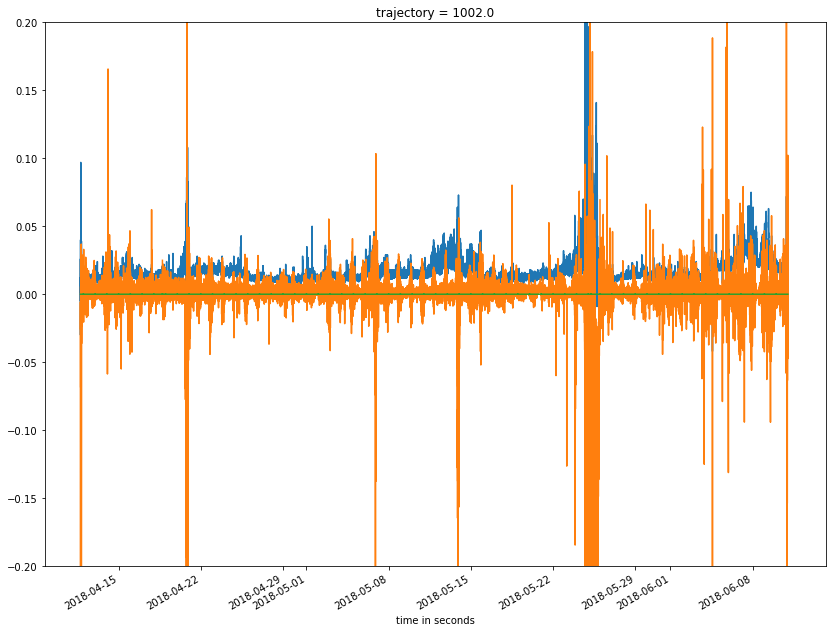

In [145]:
f, axes = plt.subplots(figsize=(14,10))
(ds.TEMP_O2_MEAN-ds.TEMP_CTD_MEAN).plot()
(ds.sea_water_temperature_logger2_mean-ds.TEMP_CTD_MEAN).plot()
((ds.sea_water_temperature_logger2_mean-ds.TEMP_CTD_MEAN)*0).plot()
plt.ylim(-0.2,0.2)
fig_fname=adir_fig+"sst_timeseries_ctd_d02.png"
plt.savefig(fig_fname, transparent=False, format='png')


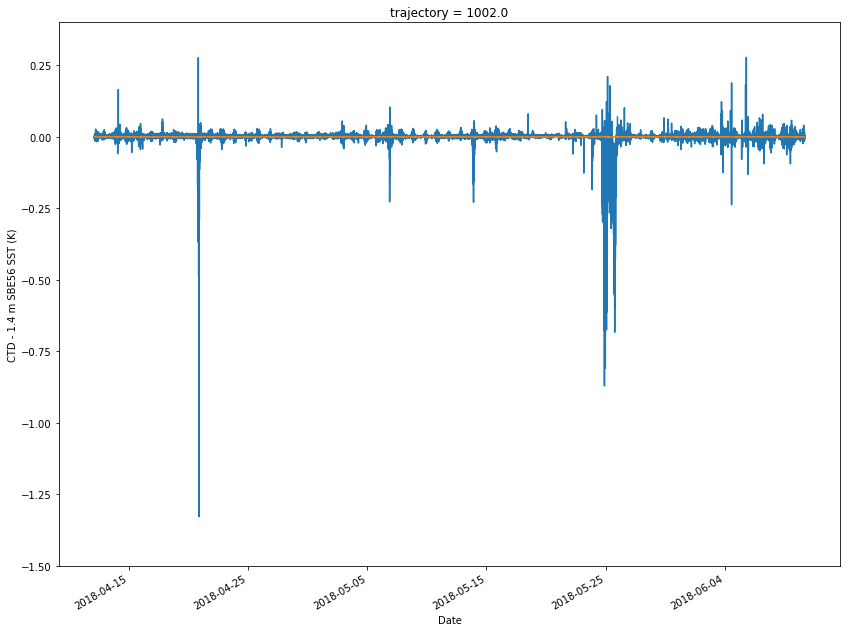

In [196]:
f, ax = plt.subplots(figsize=(14,10))
ds2=ds.isel(time=slice(500,-500))
(ds2.sea_water_temperature_logger2_mean-ds2.TEMP_CTD_MEAN).plot()
((ds2.sea_water_temperature_logger1_mean-ds2.TEMP_CTD_MEAN)*0).plot()
ax.set_ylim(-1.5,.4)
ax.set_ylabel('CTD - 1.4 m SBE56 SST (K)')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))   #to get a tick every 15 minutes
fig_fname=adir_fig+"sst_timeseries_ctd_minus_140cmSBE.png"
plt.savefig(fig_fname, transparent=False, format='png')


In [4]:

#da.sel(time=slice('2000-01-01', '2000-01-02'))
#dataset.TEMP_IR_MEAN[0,1:10000].plot()
#dataset.TEMP_CTD_MEAN[0,1:10000].plot()
#tem=dataset.sea_water_temperature_logger1_mean[0,1:10000]-273.15
#tem.plot()
#ds2=ds.set_index(ds['time'])

In [5]:
#dstem = pd.to_datetime(ds['TIME'])
#ds2.info


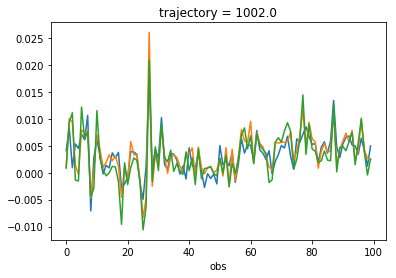

In [6]:
ds_sel=ds.sel(obs=slice(3000, 3100)) #dataset.TIME)
dif=ds_sel.sea_water_temperature_logger1_mean-ds_sel.sea_water_temperature_logger2_mean
dif.plot()
dif=ds_sel.sea_water_temperature_logger1_mean-ds_sel.sea_water_temperature_logger3_mean
dif.plot()
dif=ds_sel.sea_water_temperature_logger1_mean-ds_sel.sea_water_temperature_logger4_mean
dif.plot()


In [7]:
ds_sel.time[0]

<xarray.DataArray 'time' (obs: 100)>
array(['2018-04-13T20:00:00.000000000', '2018-04-13T20:01:00.000000000',
       '2018-04-13T20:02:00.000000000', '2018-04-13T20:03:00.000000000',
       '2018-04-13T20:04:00.000000000', '2018-04-13T20:05:00.000000000',
       '2018-04-13T20:06:00.000000000', '2018-04-13T20:07:00.000000000',
       '2018-04-13T20:08:00.000000000', '2018-04-13T20:09:00.000000000',
       '2018-04-13T20:10:00.000000000', '2018-04-13T20:11:00.000000000',
       '2018-04-13T20:12:00.000000000', '2018-04-13T20:13:00.000000000',
       '2018-04-13T20:14:00.000000000', '2018-04-13T20:15:00.000000000',
       '2018-04-13T20:16:00.000000000', '2018-04-13T20:17:00.000000000',
       '2018-04-13T20:18:00.000000000', '2018-04-13T20:19:00.000000000',
       '2018-04-13T20:20:00.000000000', '2018-04-13T20:21:00.000000000',
       '2018-04-13T20:22:00.000000000', '2018-04-13T20:23:00.000000000',
       '2018-04-13T20:24:00.000000000', '2018-04-13T20:25:00.000000000',
       '2018-0

In [21]:

#psec=pt.second
#tem=xftem[(psec <=12)]  #data average should be only use sec 54 to sec 06 of each minute 
#ds_avg = tem.resample(time='1min').mean()
#print(time_offset_to_lmt[time_offset_to_lmt.isnull()].time[:].data)  #print nan values
#interpolate lat and lon across the 6 nan values using linear method
xlon = ds.longitude.interpolate_na(dim='obs', method='linear')
xlat = ds.latitude.interpolate_na(dim='obs', method='linear')
time_offset_to_lmt=(xlon[0,:]/360.)*24.*60.*60.
date_lmt= ds.time[0,:]+time_offset_to_lmt* dt.timedelta(seconds=1)



AttributeError: 'DataArray' object has no attribute 'year'

In [32]:
tem2=(date_lmt[0].values-np.datetime64('1970-01-01'))/np.timedelta64(1,'s')
tem3=datetime.utcfromtimestamp(tem2)
day_of_year = tem3.timetuple().tm_yday
temhr = tem3.hour
print(day_of_year,temhr)

101 9


In [42]:
#date_lmt = pd.DatetimeIndex(date_lmt)
np.datetime64(date_lmt[0].data,'M')

numpy.datetime64('2018-04')

In [81]:
adir_tem='f:/data/cruise_data/saildrone/baja-2018/figs/'
from math import atan2
#adir_tem='C:/Users/gentemann/Google Drive/f_drive/docs/projects/saildrone/'
#from mpl_toolkits.basemap import Basemap
#import matplotlib.pyplot as plt
skin=ds.TEMP_IR_UNCOR_MEAN[0,:].values
tair=ds.TEMP_AIR_MEAN[0,:].values
bulk1=ds.TEMP_CTD_MEAN[0,:].values
bulk2=ds.TEMP_O2_MEAN[0,:].values
uspd=ds.UWND_MEAN[0,:].values
vspd=ds.VWND_MEAN[0,:].values
wspd=(uspd**2+vspd**2)**.5
tdim=len(wspd)

#tem_date=[0]*tdim #np.zeros(tdim)
#tem_dy_from=np.zeros(tdim)
#tem_lmt=np.zeros(tdim)
tem_date=[0]*tdim
day_of_year=[0]*tdim
tem_dy_from=[0]*tdim
hr_lmt=[0]*tdim
wdir=np.zeros(tdim)
print(ds.time.shape)
#for i in range(0,10):
#    print(float(dataset.TIME[0,i].values)/86400000000000.)
#date_1970 = dt.datetime(1970,1,1,0,0,0) # start date is1/1/1970

for i in range(0,tdim):
#    tem_dy=float(ds.time[0,i].values)/86400000000000.
    tem_dy_from[i]=float(ds.time[0,i].values)/86400000000000.-float(ds.time[0,0].values)/86400000000000.
#    tem_date[i]=date_1970+dt.timedelta(days=tem_dy)  #create new time array that can be queried for year etc
#    tem_lmt[i]=tem_date[i].hour+(ds.longitude[0,i].values/360.)*24.
#    time_offset_to_lmt=(xlon[0,:]/360.)*24.*60.*60.
#    tem_lmt= ds.time[0,:]+time_offset_to_lmt* dt.timedelta(seconds=1)
#    tem2=(tem_lmt.values-np.datetime64('1970-01-01'))/np.timedelta64(1,'s')
#    tem3=datetime.utcfromtimestamp(tem2)
#    day_of_year = tem3.timetuple().tm_yday
    tem2=(date_lmt[i].values-np.datetime64('1970-01-01'))/np.timedelta64(1,'s')
    tem3=datetime.utcfromtimestamp(tem2)
    day_of_year[i] = tem3.timetuple().tm_yday
    tem_date[i] = tem3
    hr_lmt[i] = tem3.hour + tem3.minute/60.
    
#    if tem_lmt[i]>24:
#        tem_lmt[i]=tem_lmt[i]-24.
#    if tem_lmt[i]<0:
#        tem_lmt[i]=tem_lmt[i]+24.
    wdir[i]=atan2(uspd[i],vspd[i])*180/3.14159
    if i<5:
        print(date_lmt[i],wdir[i])
        #print(tem_dy_from[i])



(1, 86839)
<xarray.DataArray ()>
array('2018-04-11T09:50:24.485376000', dtype='datetime64[ns]')
Coordinates:
    trajectory  float32 1002.0
    time        datetime64[ns] 2018-04-11T18:00:00
    latitude    float64 37.81
    longitude   float64 -122.4 44.89969515643567
<xarray.DataArray ()>
array('2018-04-11T09:51:23.855616000', dtype='datetime64[ns]')
Coordinates:
    trajectory  float32 1002.0
    time        datetime64[ns] 2018-04-11T18:01:00
    latitude    float64 37.81
    longitude   float64 -122.4 86.9434929898774
<xarray.DataArray ()>
array('2018-04-11T09:52:23.170560000', dtype='datetime64[ns]')
Coordinates:
    trajectory  float32 1002.0
    time        datetime64[ns] 2018-04-11T18:02:00
    latitude    float64 37.81
    longitude   float64 -122.4 89.13947380305854
<xarray.DataArray ()>
array('2018-04-11T09:53:22.507008000', dtype='datetime64[ns]')
Coordinates:
    trajectory  float32 1002.0
    time        datetime64[ns] 2018-04-11T18:03:00
    latitude    float64 37.81
   

101

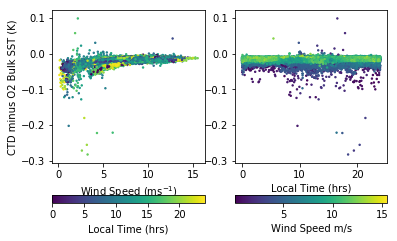

f:/data/cruise_data/saildrone/baja-2018/figs/wndbulk.png


In [50]:
fig, (ax1,ax2) = plt.subplots(1,2) #figure(2,figsize=(11.7,8.3))
cs=ax1.scatter(wspd, bulk1-bulk2,c=hr_lmt,s=2) #,label=tem_lmt) #, s=area, c=colors, alpha=0.5)
ax1.set(xlabel='Wind Speed (ms$^{-1}$)', ylabel='CTD minus O2 Bulk SST (K)')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cs,orientation='horizontal',ax=ax1)
cbar.set_label('Local Time (hrs)')
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
#fig.colorbar(mappable='none') #,location="bottom",label='wind speed')
cs2=ax2.scatter(hr_lmt, bulk1-bulk2,c=wspd,s=2) #,label=tem_lmt) #, s=area, c=colors, alpha=0.5)
ax2.set(xlabel='Local Time (hrs)')
cbar = fig.colorbar(cs2,orientation='horizontal',ax=ax2)
cbar.set_label('Wind Speed m/s')
fig_fname=adir_tem+"wndbulk.png"
fig.savefig(fig_fname, transparent=False, format='png')
plt.show()
print(fig_fname)

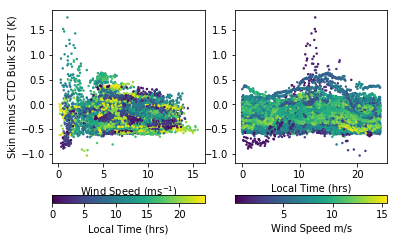

f:/data/cruise_data/saildrone/baja-2018/figs/skinwndbulk.png


In [52]:
fig, (ax1,ax2) = plt.subplots(1,2) #figure(2,figsize=(11.7,8.3))
cs=ax1.scatter(wspd, skin-bulk1,c=hr_lmt,s=2) #,label=tem_lmt) #, s=area, c=colors, alpha=0.5)
ax1.set(xlabel='Wind Speed (ms$^{-1}$)', ylabel='Skin minus CTD Bulk SST (K)')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cs,orientation='horizontal',ax=ax1)
cbar.set_label('Local Time (hrs)')
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
#fig.colorbar(mappable='none') #,location="bottom",label='wind speed')
cs2=ax2.scatter(hr_lmt, skin-bulk1,c=wspd,s=2) #,label=tem_lmt) #, s=area, c=colors, alpha=0.5)
ax2.set(xlabel='Local Time (hrs)')
cbar = fig.colorbar(cs2,orientation='horizontal',ax=ax2)
cbar.set_label('Wind Speed m/s')
fig_fname=adir_tem+"skinwndbulk.png"
fig.savefig(fig_fname, transparent=False, format='png')
plt.show()
print(fig_fname)

In [70]:
#print(tem_date[1]-tem_date[0])
#tem_dy_from=[0]*tdim
#for i in range(0,tdim):
#    tem = tem_date[i] - tem_date[0]
#    tem_dy_from[i]=tem.days 
#print(tem_dy_from[0],tem_dy_from[-1])

0:00:59.370240


86839
86839 86839
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.] 12.0 12.0
[0.0, 0.34722222222262644, 0.6944444444452529, 1.0416666666678793, 1.3888888888905058, 1.7361111111094942, 2.0833333333321207, 2.430555555554747, 2.7777777777773736, 3.125] 60.49791666666715
60 days, 11:57:21.660672
f:/data/cruise_data/saildrone/baja-2018/figs/skin-bulk/skinbulk_TS0.png
f:/data/cruise_data/saildrone/baja-2018/figs/skin-bulk/skinbulk_TS1.png
f:/data/cruise_data/saildrone/baja-2018/figs/skin-bulk/skinbulk_TS2.png
f:/data/cruise_data/saildrone/baja-2018/figs/skin-bulk/skinbulk_TS3.png
f:/data/cruise_data/saildrone/baja-2018/figs/skin-bulk/skinbulk_TS4.png
f:/data/cruise_data/saildrone/baja-2018/figs/skin-bulk/skinbulk_TS5.png
f:/data/cruise_data/saildrone/baja-2018/figs/skin-bulk/skinbulk_TS6.png
f:/data/cruise_data/saildrone/baja-2018/figs/skin-bulk/skinbulk_TS7.png
f:/data/cruise_data/saildrone/baja-2018/figs/skin-bulk/skinbulk_TS8.png
f:/data/cruise_data/saildrone/baja-2018/figs/skin-bulk/skinbulk_TS9.png
f:/d

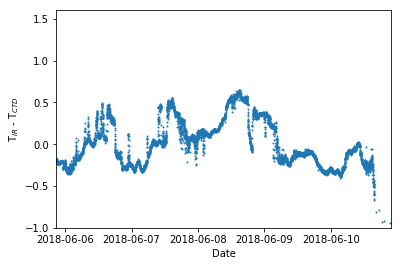

In [83]:
print(len(tem_dy_from))
print(len(skin-bulk1),tdim)
item=np.zeros(tdim)
for i in range(0,tdim):
    item[i]=int(round(tem_dy_from[i]/5.))
print(item[0:5000:500],max(item),item[tdim-1])
print(tem_dy_from[0:5000:500],tem_dy_from[tdim-1])
dt=skin-bulk1
i=0
mindy=min(tem_date)
maxdy=max(tem_date)
print(maxdy-mindy)
intdy=(maxdy-mindy)/12.
#print(len(tem_dy_from[item==i]))
fig, ax1 = plt.subplots() #figure(2,figsize=(11.7,8.3))
#plt.scatter(tem_dy_from[item==i],dt[item==i],s=1,c=pitch[item==i])
plt.scatter(tem_date,dt,s=1)
   # plt.scatter(tem_dy_from[item==i],dt[item==i]-.5,s=1,c=roll[item==i])
   # plt.scatter(tem_dy_from[item==i],dt[item==i]-1.0,s=1,c=heading[item==i])
   # plt.scatter(tem_dy_from[item==i],dt[item==i]-1.5,s=1,c=wing_ang[item==i])
plt.xlabel('Date')
plt.ylabel('T$_{IR}$ - T$_{CTD}$')
for i in range(0,12):
    plt.ylim(-1, 1.6)
    plt.xlim(mindy+i*intdy,mindy+(i+1)*intdy)
    #plt.show()
    fig_fname=adir_tem+'skin-bulk/skinbulk_TS' + str(i) +'.png'
    print(fig_fname)
    fig.savefig(fig_fname, transparent=False, format='png')


86839
86839
f:/data/cruise_data/saildrone/baja-2018/figs/skinbulk_TS.png


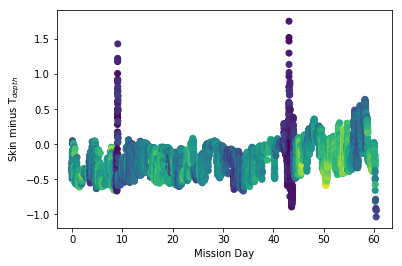

In [84]:
fig, ax1 = plt.subplots() #figure(2,figsize=(11.7,8.3))
print(len(tem_dy_from))
print(len(skin-bulk1))
#print(len(tem_dy_from),len(dt))
plt.scatter(tem_dy_from,skin-bulk1,c=wspd)
plt.xlabel('Mission Day')
plt.ylabel('Skin minus T$_{depth}$')
#plt.xlim(2018)
#plt.ylim(-2, 2)
fig_fname=adir_tem+"skinbulk_TS.png"
fig.savefig(fig_fname, transparent=False, format='png')
print(fig_fname)

2018-04-12T04:25:00.000000000 2018-04-12T05:49:00.000000000
2018-04-12T19:45:00.000000000 2018-04-13T06:59:00.000000000


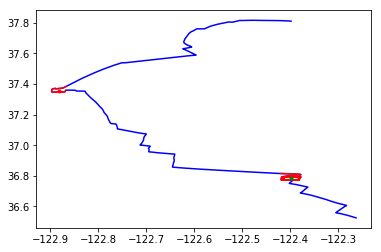

In [134]:
#plot buoys on track to figure out dates
i1, i2=0, 2500
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
i1, i2=625, 710
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
plt.plot(-122.881, 37.356,'r.') #46012
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())
i1, i2=1545, 2220
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
plt.plot(-122.398,36.785,'g.') #46042
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-04-14T02:00:00.000000000 2018-04-14T13:49:00.000000000


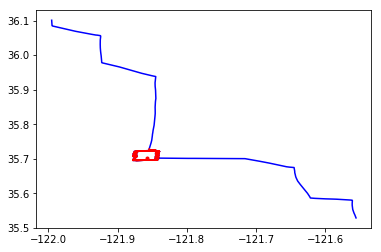

In [157]:
i1, i2=3000, 4500
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
i1, i2=3360,4070
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
plt.plot(-121.857,35.703,'r.') #46028
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-04-15T14:50:00.000000000 2018-04-15T23:49:00.000000000


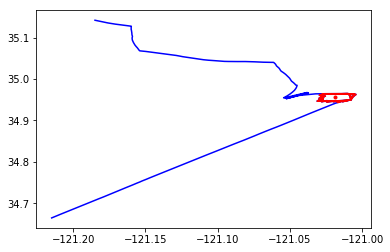

In [174]:
i1, i2=5000, 6500
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
i1, i2=5570,6110
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
plt.plot(-121.019, 34.956,'r.') #46011
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-04-16T22:10:00.000000000 2018-04-17T03:09:00.000000000


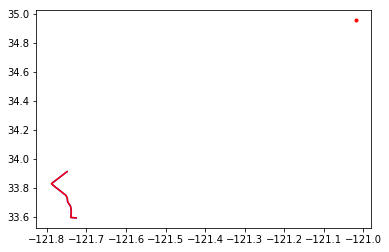

In [188]:
i1, i2=7450, 7750
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
#i1, i2=5570,6110
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
plt.plot(-121.019, 34.956,'r.') #glider line
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-04-18T15:25:00.000000000 2018-04-19T03:59:00.000000000
2018-04-20T00:50:00.000000000 2018-04-20T15:59:00.000000000


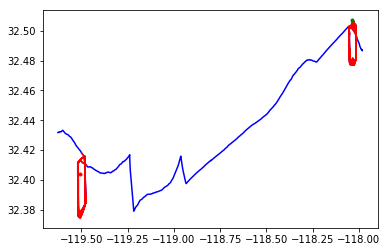

In [233]:
i1, i2=9800, 13000
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
i1, i2=9925,10680
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
#plt.plot(-120.582, 32.400,'r.') #46412
plt.plot(-119.506, 32.404,'r.') #46047
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())
i1, i2=11930,12840
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
plt.plot(-118.036, 32.507,'g.') #46086
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-04-20T18:40:00.000000000 2018-04-25T15:19:00.000000000


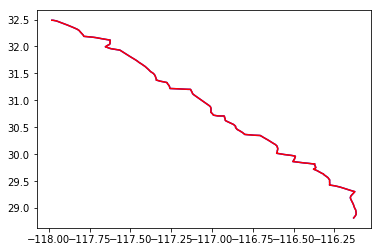

In [237]:
i1, i2=13000, 20000
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
#i1, i2=9925,10000
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-04-27T00:40:00.000000000 2018-05-16T11:19:00.000000000


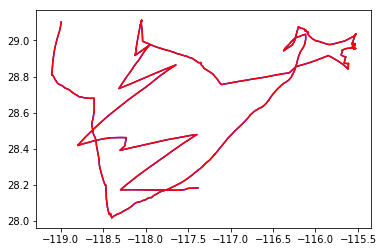

In [244]:
i1, i2=22000, 50000
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
#i1, i2=9925,10000
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-05-16T11:20:00.000000000 2018-05-26T16:19:00.000000000


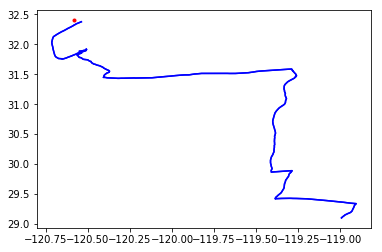

In [258]:
i1, i2=50000, 64700
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
#i1, i2=9925,10000
#plt.plot(-119.506, 32.404,'r.') #46047
#plt.plot(-118.036, 32.507,'r.') #46086
#plt.plot(-121.019, 34.956,'r.') #46011
plt.plot(-120.582, 32.400,'r.') #46412
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-05-31T02:00:00.000000000 2018-05-31T07:09:00.000000000


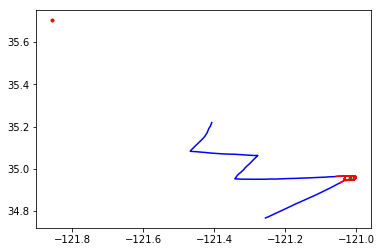

In [295]:
i1, i2=70700, 72000
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
i1, i2=71040,71350
#plt.plot(-119.506, 32.404,'r.') #46047
#plt.plot(-118.036, 32.507,'r.') #46086
plt.plot(-121.857, 35.703,'r.') #46028
plt.plot(-121.019, 34.956,'g.') #46011
#plt.plot(-120.582, 32.400,'g.') #46412
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-06-01T13:10:00.000000000 2018-06-01T23:39:00.000000000


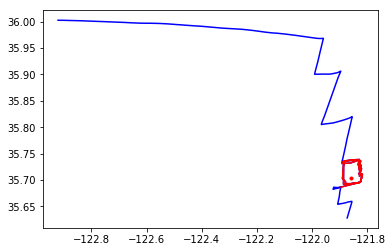

In [309]:
i1, i2=73000, 75000
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
i1, i2=73150,73780
#plt.plot(-119.506, 32.404,'r.') #46047
#plt.plot(-118.036, 32.507,'r.') #46086
plt.plot(-121.857, 35.703,'r.') #46028
#plt.plot(-121.019, 34.956,'g.') #46011
#plt.plot(-120.582, 32.400,'g.') #46412
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-06-01T22:20:00.000000000 2018-06-04T23:39:00.000000000
2018-06-03T19:20:00.000000000 2018-06-04T23:39:00.000000000


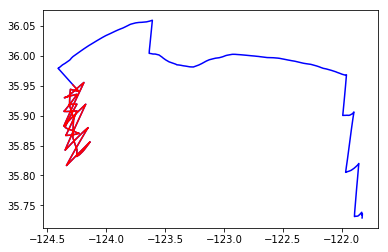

In [323]:
i1, i2=73700, 78100
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())
i1, i2=76400,78100
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


2018-06-03T19:20:00.000000000 2018-06-11T05:57:00.000000000
2018-06-04T23:40:00.000000000 2018-06-09T20:19:00.000000000


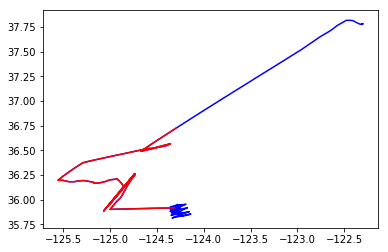

In [327]:
i1, i2=76400,tdim
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())
i1, i2=78100,85100
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


In [325]:
tdim

86839

2018-06-03T19:20:00.000000000 2018-06-04T23:39:00.000000000


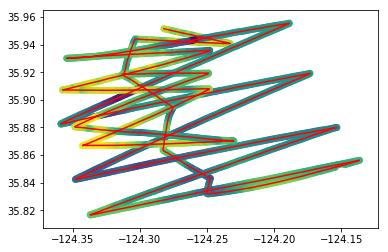

In [332]:
#eddy exploration
i1, i2=76400,78100
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
plt.scatter(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],c=ds.TEMP_IR_UNCOR_MEAN[0,i1:i2])
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


In [333]:
#import matplotlib as mpl
#import openpyxl



ModuleNotFoundError: No module named 'palettable'

In [329]:
ds

<xarray.Dataset>
Dimensions:                               (obs: 86839, trajectory: 1)
Coordinates:
  * trajectory                            (trajectory) float32 1002.0
    time                                  (trajectory, obs) datetime64[ns] ...
    latitude                              (trajectory, obs) float64 ...
    longitude                             (trajectory, obs) float64 ...
Dimensions without coordinates: obs
Data variables:
    SOG                                   (trajectory, obs) float64 ...
    COG                                   (trajectory, obs) float64 ...
    HDG                                   (trajectory, obs) float64 ...
    HDG_WING                              (trajectory, obs) float64 ...
    ROLL                                  (trajectory, obs) float64 ...
    PITCH                                 (trajectory, obs) float64 ...
    WING_ANGLE                            (trajectory, obs) float64 ...
    BARO_PRES_MEAN                        (trajecto